<center><img src='../assets/images/aau_logo.png' width='10%'></center>

<br>
<center><h3>Addis Ababa University
<br>College of Natural and Computational Sciences
<br>Department of Computer Science</h3></center>

---
<center><h1 style="font-weight: bold;">CoSc 6262: Data Science</h1></center>
<center><img src='../assets/images/numpy_logo.png' width='25%'></center>
<br>
<center><h2>Assignment 2: K-Means Clustering with NumPy</h2></center>

---

In this exercise you write some parts of an implementation of the k-means clustering algorithm.

Don't worry too much if you don't know how every part of this algorithm and code is working.
It's more important that you understand the individual numpy commands that you will write.

k-means works by randomly selecting a chosen number of points as cluster centers to begin with.
The following two steps are then run recursively until the cluster converge:
* Assign all points to the cluster that they are nearest to
* Update each cluster point location so that it is at the centroid (i.e. average position) of all points assigned to that cluster

A better explanation can be found at the following video (recommended):
https://www.youtube.com/watch?v=hDmNF9JG3lo

Or you can read the wikipedia page:
https://en.wikipedia.org/wiki/K-means_clustering

Again, don't worry if you don't understand how this algorithm works. It's more important that you can write the required numpy commands

## Questions

### Step 1: Create a dataset to do clustering on

We need to generate a dataset to do our k-means clustering on. We will generate datapoints in 2 dimensions by sampling from 3 different distributions. This should give us three obvious clusters which the k-means algorithm should pick up.

Below we have generated some points from a standard normal distrubution (i.e. with mean 0 and standard deviation of 1)

You ahould create two new sets of points; one from a normal distribution with mean 10 and standard deviation of 2, and another from a normal distribution with mean 5 and standard deviation of 2. Each of these sets should have 100 points. Check out the documentation for the [numpy.random.normal](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html) function in order to do this.

Finally you should put all points from these 3 datasets into a single dataset (called pts below). You can use the [numpy.concatenate](https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html) function to do this

In [1]:
# generate random 2D points from three distributions
import numpy as np

pts1 = np.random.standard_normal((100, 2))

# generate 100 points from a normal distribution with mean 10 and standard deviation of 2
pts2 = np.random.normal(10, 2, size=(100, 2))

# generate 100 points from a normal distribution with mean 5 and standard deviation of 2
pts3 = np.random.normal(5, 2, size=(100, 2))

# Put points from pts1, pts2, and pts3 in a single dataset
pts = np.concatenate([pts1, pts2, pts3], axis=0)

# Sanity check
print("pts1:", pts1.shape)
print("pts2:", pts2.shape)
print("pts3:", pts3.shape)
print("Combined pts:", pts.shape)

pts1: (100, 2)
pts2: (100, 2)
pts3: (100, 2)
Combined pts: (300, 2)


Run the cell below to display your data on a scatter plot

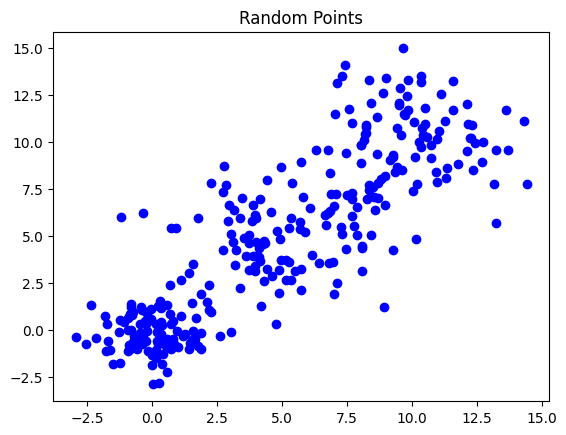

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt

# plot the random points
plt.plot(pts[:,0], pts[:,1], 'bo')
plt.title('Random Points')
plt.show()

### Step 2: Create functions to compute k-means

This part is the actual k-means implementation. 

We first create 3 functions which will be put together at the end in the kmeans function.

#### Part 1 (get_labels):
The get_labels function takes a list of points and a list which containt the locations of the centroids (i.e. the location of each cluster point).
The index of each point in the centroids list serves as a label for that cluster.

In the for loop within the get_labels function, the distance to each centroid for the point in question is added to the list called distances. __Your job is to append the index of the minimum value in distances to list called labels.__ Check out the (numpy.argmin)[https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmin.html] documentation.

#### Part 2 (get_centroids):
In the get_centroids function, we loop over each centroid label and (re)calculate the mean postion of points assigned that label. __You should append the mean position for label in question to the centroids list within the for loop.__ The (numpy.mean)[https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html] function can be used to calculate the mean of 2 dimensional points. You will need to use (numpy.where)[https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html] to make sure you are calculating the mean __only for the points assigned to that label.__

#### Part 3 (converged):
The converged function takes two numpy arrays (containing centroid locations) as input arguments and returns True if the lists are equal. For this part use google and the numpy documentation to find out how to check if two numpy arrays are equal. What function(s) do you need to use?

In [3]:
from numpy import linalg as LA

def get_labels(points, centroids):
    labels = []
    for point in points:
        distances = [LA.norm(point - centroid) for centroid in centroids]
        # Append the index of the centroid with the minimum distance
        labels.append(np.argmin(distances))
    return np.array(labels)

def get_centroids(points, labels, k):
    centroids = []
    for label in range(k):
        # Select all points assigned to the current label
        points_assigned = points[labels == label]
        # Check to avoid division by zero if no points assigned to a cluster, then reinitialize randomly
        if len(points_assigned) > 0:
            centroids.append(np.mean(points_assigned, axis=0))
        else:
            # Reinitialize empty cluster's centroid randomly from points
            centroids.append(points[np.random.randint(0, points.shape[0])])
    return np.array(centroids)
        
def converged(old_centroids, centroids):
    # If old_centroids is None, then k-means has not run even one iteration
    if old_centroids is None:
        return False
    # Check element-wise equality of the two arrays
    return np.array_equal(old_centroids, centroids)

#### Part 4 (k-means):

The k-means function puts everything together. It runs k-means on the points list for a number of clusters, k.

At the beginning of the function we need to choose k random points to initialize our k clusters. You can simply choose the location of k random points within the points list as initial points for the clusters.

__Create a list of locations of k random points from the points list and assign it to the variable names centroids at the beginning of the function__. Hint: You can use the numpy.random.randint function to generate a list of random integers.

In [4]:
def kmeans(points, k):
    # Initialize centroids randomly from the dataset
    centroids = points[np.random.randint(low=0, high=points.shape[0], size=k)]
    
    iterations = 0
    old_centroids = None
    
    while not converged(old_centroids, centroids):
        old_centroids = centroids
        iterations += 1
        
        # Assign labels to each datapoint based on current centroids
        labels = get_labels(points, centroids)
        
        # Update centroids based on assigned labels
        centroids = get_centroids(points, labels, k)
        
    print("\nConverged in", iterations, "iterations")
    return centroids

### Step 3: Run the remaining cells to run k-means on the pts set you created earlier

The final cell will create a color coded scatter plot of the calculated clusters.

When you are done you can change the number of clusters, k, to defferent values to see happens.

In [5]:
k=5
centroids = kmeans(pts,k)


Converged in 10 iterations


In [6]:
print(centroids)

[[ 8.83105378 11.72139986]
 [ 0.0795425  -0.10053044]
 [ 3.85303701  4.55365765]
 [ 7.56664278  6.16723839]
 [11.42151661  9.49945858]]


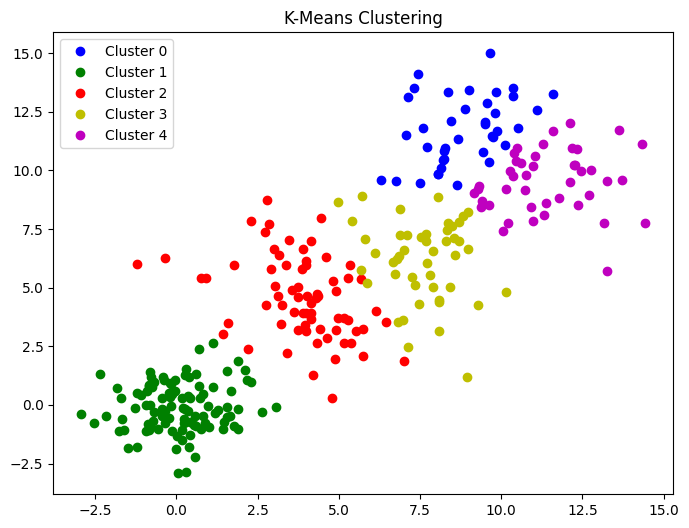

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt

colors = ['b', 'g', 'r', 'y', 'm', 'k', 'c']

labels = get_labels(pts, centroids)
plt.figure(figsize=(8, 6))
for i in range(k):
    cluster_points = pts[np.where(labels == i)]
    plt.plot(cluster_points[:, 0], cluster_points[:, 1], '%so' % colors[i], label=f"Cluster {i}")
plt.title("K-Means Clustering")
plt.legend()
plt.show()

## Additional Cells

### k-means with history

Function that runs kmeans but saves centroids and labels after each iteration.

In [8]:
def kmeans_history(points, k, max_iters=100):
    centroids = points[np.random.randint(low=0, high=points.shape[0], size=k)]
    history = [centroids.copy()]
    labels_history = []
    old_centroids = None
    iterations = 0
    while not converged(old_centroids, centroids) and iterations < max_iters:
        old_centroids = centroids.copy()
        iterations += 1
        
        labels = get_labels(points, centroids)
        labels_history.append(labels.copy())
        
        centroids = get_centroids(points, labels, k)
        history.append(centroids.copy())
    
    print("\nConverged in", iterations, "iterations")
    return history, labels_history

history, labels_history = kmeans_history(pts, 5)


Converged in 15 iterations


### Animated visualization

Animation to show how the clusters change over each iteration.

In [9]:
%matplotlib notebook

from IPython.display import display, HTML
import matplotlib.animation as animation

fig, ax = plt.subplots()
colors = ['b', 'g', 'r', 'y', 'm', 'k', 'c']

def update(frame):
    ax.clear()
    current_centroids = history[frame]
    current_labels = get_labels(pts, current_centroids)
    for i in range(len(current_centroids)):
        cluster_pts = pts[current_labels == i]
        ax.scatter(cluster_pts[:, 0], cluster_pts[:, 1], c=colors[i], label=f"Cluster {i}")
    ax.scatter(current_centroids[:, 0], current_centroids[:, 1], 
               c='black', marker='x', s=100, label="Centroids")
    ax.set_title(f"K-Means Iteration {frame}")
    ax.legend()

anim = animation.FuncAnimation(fig, update, frames=len(history), interval=800, repeat=True)
display(HTML(anim.to_jshtml()))

<IPython.core.display.Javascript object>

### Inertia plot

Computation and plots of the inertia (total within-cluster sum of squares) versus different numbers of clusters. This helps in picking a value for k.

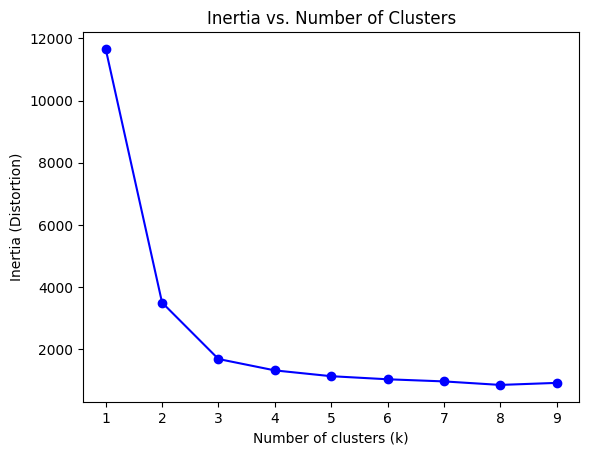

In [10]:
%matplotlib inline

def compute_inertia(points, centroids, labels):
    inertia = 0.0
    for i, centroid in enumerate(centroids):
        cluster_pts = points[labels == i]
        inertia += np.sum((cluster_pts - centroid)**2)
    return inertia

inertias = []
ks = range(1, 10)
for k_val in ks:
    centroids_tmp = pts[np.random.randint(low=0, high=pts.shape[0], size=k_val)]
    old_centroids = None
    iterations = 0
    while not converged(old_centroids, centroids_tmp):
        old_centroids = centroids_tmp.copy()
        labels = get_labels(pts, centroids_tmp)
        centroids_tmp = get_centroids(pts, labels, k_val)
        iterations += 1
        if iterations > 100:
            break
    inertia_val = compute_inertia(pts, centroids_tmp, labels)
    inertias.append(inertia_val)

plt.plot(ks, inertias, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Distortion)')
plt.title('Inertia vs. Number of Clusters')
plt.show()

### Silhouette score

A simple function to compute the average silhouette score, a measure of clustering quality.

In [11]:
def silhouette_score(points, labels):
    unique_labels = np.unique(labels)
    scores = []
    for i, p in enumerate(points):
        label = labels[i]
        same_cluster = points[labels == label]
        # Average intra-cluster distance (avoid self-distance)
        if len(same_cluster) > 1:
            a = np.mean(np.linalg.norm(p - same_cluster, axis=1))
        else:
            a = 0
        b = np.inf
        for other_label in unique_labels:
            if other_label == label:
                continue
            other_cluster = points[labels == other_label]
            b = min(b, np.mean(np.linalg.norm(p - other_cluster, axis=1)))
        scores.append((b - a) / max(a, b) if max(a, b) != 0 else 0)
    return np.mean(scores)

# Using current centroids from the earlier kmeans run
final_labels = get_labels(pts, centroids)
sil_score = silhouette_score(pts, final_labels)
print("\nSilhouette Score for k = 5:", sil_score)


Silhouette Score for k = 5: 0.4788478806106385
